我们经常需要对分析的数据提取常用词，做词云展示。比如一些互联网公司会抓取用户的画像，或者每日讨论话题的关键词，形成词云并进行展示。再或者，假如你喜欢某个歌手，想了解这个歌手创作的歌曲中经常用到哪些词语，词云就是个很好的工具。最后，只需要将词云生成一张图片就可以直观地看到结果。

那么在今天的实战项目里，有 3 个目标需要掌握：

1、掌握词云分析工具，并进行可视化呈现；
2、掌握 Python 爬虫，对网页的数据进行爬取；
3、掌握 XPath 工具，分析提取想要的元素 。

**如何制作词云**

首先我们需要了解什么是词云。词云也叫文字云，它帮助我们统计文本中高频出现的词，过滤掉某些常用词（比如“作曲”“作词”），将文本中的重要关键词进行可视化，方便分析者更好更快地了解文本的重点，同时还具有一定的美观度。

Python 提供了词云工具 WordCloud，使用 pip install wordcloud 安装后，就可以创建一个词云，构造方法如下：

In [5]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import requests

wc = WordCloud(
    background_color='white',# 设置背景颜色
    mask=backgroud_Image,# 设置背景图片
    font_path='./SimHei.ttf',  # 设置字体，针对中文的情况需要设置中文字体，否则显示乱码
    max_words=100, # 设置最大的字数
    stopwords=STOPWORDS,# 设置停用词
  max_font_size=150,# 设置字体最大值
  width=2000,# 设置画布的宽度
  height=1200,# 设置画布的高度
    random_state=30# 设置多少种随机状态，即多少种颜色
)

NameError: name 'backgroud_Image' is not defined

实际上 WordCloud 还有更多的构造参数，代码里展示的是一些主要参数，我在代码中都有注释，你可以自己看下。

创建好 WordCloud 类之后，就可以使用 wordcloud=generate(text) 方法生成词云，传入的参数 text 代表你要分析的文本，最后使用 wordcloud.tofile(“a.jpg”) 函数，将得到的词云图像直接保存为图片格式文件。

你也可以使用 Python 的可视化工具 Matplotlib 进行显示，方法如下：

In [2]:
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

NameError: name 'wordcloud' is not defined

需要注意的是，我们不需要显示 X 轴和 Y 轴的坐标，使用 plt.axis(“off”) 可以将坐标轴关闭。

了解了如何使用词云工具 WordCloud 之后，我们将专栏前 15 节的标题进行词云可视化，具体的代码如下：

In [3]:
#-*- coding:utf-8 -*-
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import jieba
from PIL import Image
import numpy as np
# 生成词云
def create_word_cloud(f):
     print('根据词频计算词云')
     text = " ".join(jieba.cut(f,cut_all=False, HMM=True))
     wc = WordCloud(
           font_path="./SimHei.ttf",
           max_words=100,
           width=2000,
           height=1200,
    )
     wordcloud = wc.generate(text)
     # 写词云图片
     wordcloud.to_file("wordcloud.jpg")
     # 显示词云文件
     plt.imshow(wordcloud)
     plt.axis("off")
     plt.show()

f = '数据分析全景图及修炼指南\
学习数据挖掘的最佳学习路径是什么？\
Python基础语法：开始你的Python之旅\
Python科学计算：NumPy\
Python科学计算：Pandas\
学习数据分析要掌握哪些基本概念？\
用户画像：标签化就是数据的抽象能力\
数据采集：如何自动化采集数据？\
数据采集：如何用八爪鱼采集微博上的“D&G”评论？\
Python爬虫：如何自动化下载王祖贤海报？\
数据清洗：数据科学家80%时间都花费在了这里？\
数据集成：这些大号一共20亿粉丝？\
数据变换：大学成绩要求正态分布合理么？\
数据可视化：掌握数据领域的万金油技能\
一次学会Python数据可视化的10种技能'

ModuleNotFoundError: No module named 'wordcloud'

你能从结果中看出，还是有一些常用词显示出来了，比如“什么”“要求”“这些”等，我们可以把这些词设置为停用词，编写 remove_stop_words 函数，从文本中去掉，然后在结算词云前调用 f = remove_stop_words(f) 方法，最后运行：

In [4]:
# 去掉停用词
def remove_stop_words(f):
     stop_words = ['学会', '就是', '什么']
     for stop_word in stop_words:
           f = f.replace(stop_word, '')
     return f

你能看出，去掉停用词之后的词云更加清晰，更能体现前 15 章的主要内容。

**给毛不易的歌词制作词云**

假设我们现在要给毛不易的歌词做个词云，那么需要怎么做呢？我们先把整个项目的流程梳理下：

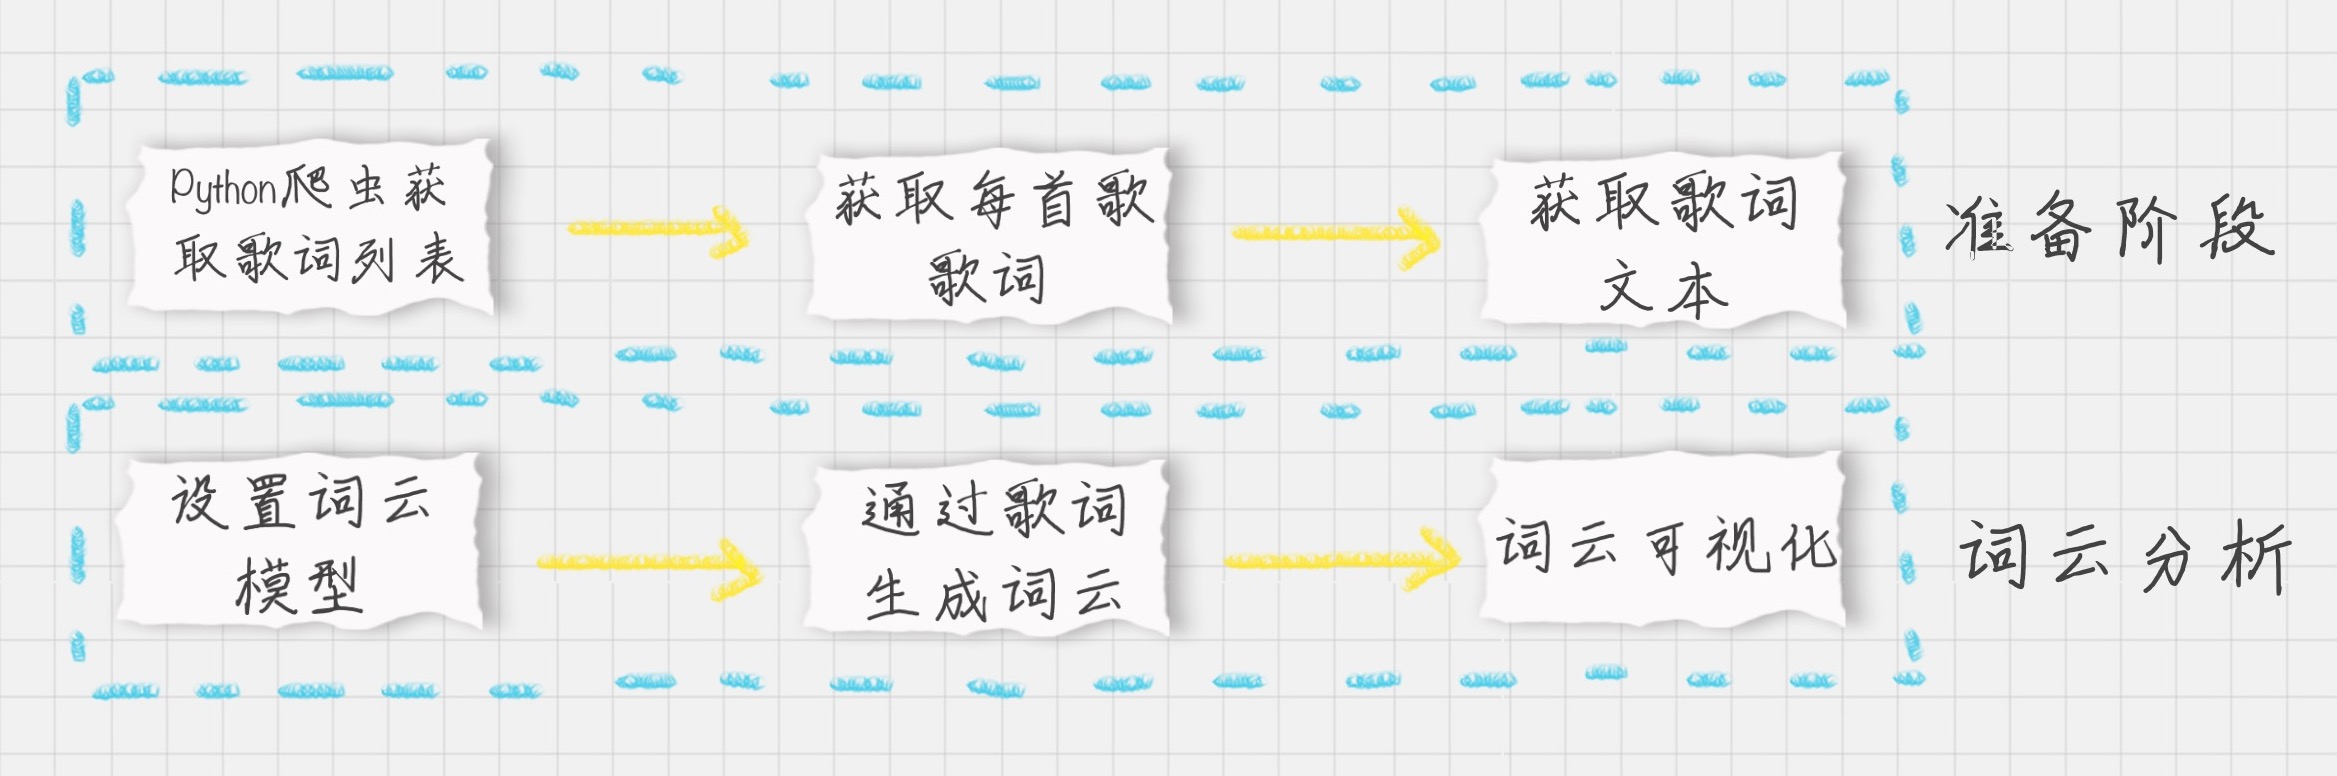

1、在准备阶段：我们主要使用 Python 爬虫获取 HTML，用 XPath 对歌曲的 ID、名称进行解析，然后通过网易云音乐的 API 接口获取每首歌的歌词，最后将所有的歌词合并得到一个变量。

2、在词云分析阶段，我们需要创建 WordCloud 词云类，分析得到的歌词文本，最后可视化。

基于上面的流程，编写代码如下：

In [ ]:
# -*- coding:utf-8 -*-
# 网易云音乐 通过歌手ID，生成该歌手的词云
import requests
import sys
import re
import os
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import jieba
from PIL import Image
import numpy as np
from lxml import etree
 
headers = {
       'Referer'  :'http://music.163.com',
       'Host'     :'music.163.com',
       'Accept'   :'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8',
       'User-Agent':'Chrome/10'
    }
 
# 得到某一首歌的歌词
def get_song_lyric(headers,lyric_url):
    res = requests.request('GET', lyric_url, headers=headers)
    if 'lrc' in res.json():
       lyric = res.json()['lrc']['lyric']
       new_lyric = re.sub(r'[\d:.[\]]','',lyric)
       return new_lyric
    else:
       return ''
       print(res.json())
# 去掉停用词
def remove_stop_words(f):
    stop_words = ['作词', '作曲', '编曲', 'Arranger', '录音', '混音', '人声', 'Vocal', '弦乐', 'Keyboard', '键盘', '编辑', '助理', 'Assistants', 'Mixing', 'Editing', 'Recording', '音乐', '制作', 'Producer', '发行', 'produced', 'and', 'distributed']
    for stop_word in stop_words:
       f = f.replace(stop_word, '')
    return f
# 生成词云
def create_word_cloud(f):
    print('根据词频，开始生成词云!')
    f = remove_stop_words(f)
    cut_text = " ".join(jieba.cut(f,cut_all=False, HMM=True))
    wc = WordCloud(
       font_path="./wc.ttf",
       max_words=100,
       width=2000,
       height=1200,
    )
    print(cut_text)
    wordcloud = wc.generate(cut_text)
    # 写词云图片
    wordcloud.to_file("wordcloud.jpg")
    # 显示词云文件
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
# 得到指定歌手页面 热门前50的歌曲ID，歌曲名
def get_songs(artist_id):
    page_url = 'https://music.163.com/artist?id=' + artist_id
    # 获取网页HTML
    res = requests.request('GET', page_url, headers=headers)
    # 用XPath解析 前50首热门歌曲
    html = etree.HTML(res.text)
    href_xpath = "//*[@id='hotsong-list']//a/@href"
    name_xpath = "//*[@id='hotsong-list']//a/text()"
    hrefs = html.xpath(href_xpath)
    names = html.xpath(name_xpath)
    # 设置热门歌曲的ID，歌曲名称
    song_ids = []
    song_names = []
    for href, name in zip(hrefs, names):
       song_ids.append(href[9:])
       song_names.append(name)
       print(href, '  ', name)
    return song_ids, song_names
# 设置歌手ID，毛不易为12138269
artist_id = '12138269'
[song_ids, song_names] = get_songs(artist_id)
# 所有歌词
all_word = ''
# 获取每首歌歌词
for (song_id, song_name) in zip(song_ids, song_names):
    # 歌词API URL
    lyric_url = 'http://music.163.com/api/song/lyric?os=pc&id=' + song_id + '&lv=-1&kv=-1&tv=-1'
    lyric = get_song_lyric(headers, lyric_url)
    all_word = all_word + ' ' + lyric
    print(song_name)
#根据词频 生成词云
create_word_cloud(all_word)

这个过程里有一些模块，我需要说明下。

首先我编写 get_songs 函数，可以得到指定歌手页面中热门前 50 的歌曲 ID，歌曲名。在这个函数里，我使用 requests.request 函数获取毛不易歌手页面的 HTML。这里需要传入指定的请求头（headers），否则获取不到完整的信息。然后用 XPath 解析并获取指定的内容，这个模块中，我想获取的是歌曲的链接和名称。

其中歌曲的链接类似 /song?id=536099160 这种形式，你能看到字符串第 9 位之后，就是歌曲的 ID。

有关 XPath 解析的内容，我在第 10 节讲到过，如果你忘记了，可以看一下。一般来说，XPath 解析 99% 的可能都是以 // 开头，因为你需要获取所有符合这个 XPath 的内容。我们通过分析 HTML 代码，能看到一个关键的部分：id=‘hotsong-list’。这个代表热门歌曲列表，也正是我们想要解析的内容。我们想要获取这个热门歌曲列表下面所有的链接，XPath 解析就可以写成 //*[@id=‘hotsong-list’]//a。然后你能看到歌曲链接是 href 属性，歌曲名称是这个链接的文本。

获得歌曲 ID 之后，我们还需要知道这个歌曲的歌词，对应代码中的 get_song_lyric 函数，在这个函数里调用了网易云的歌词 API 接口，比如

http://music.163.com/api/song/lyric?os=pc&id=536099160&lv=-1&kv=-1&tv=-1

你能看到歌词文件里面还保存了时间信息，我们需要去掉这部分。因此我使用了 re.sub 函数，通过正则表达式匹配，将[]中数字信息去掉，方法为 re.sub(r’[\d:.[]]’,’’,lyric)。

最后我们还需要设置一些歌词中常用的停用词，比如“作词”“作曲”“编曲”等，编写 remove_stop_words 函数，将歌词文本中的停用词去掉。

最后编写 create_word_cloud 函数，通过歌词文本生成词云文件。

**总结**

今天我给你讲了词云的可视化。在这个实战中，你能看到前期的数据准备在整个过程中占了很大一部分。如果你用 Python 作为数据采集工具，就需要掌握 Python 爬虫和 XPath 解析，掌握这两个工具最好的方式就是多做练习。

我们今天讲到了词云工具 WordCloud，它是一个很好用的 Python 工具，可以将复杂的文本通过词云图的方式呈现。需要注意的是，当我们需要使用中文字体的时候，比如黑体 SimHei，就可以将 WordCloud 中的 font_path 属性设置为 SimHei.ttf，你也可以设置其他艺术字体，在给毛不易的歌词做词云展示的时候，我们就用到了艺术字体。

你可以从 GitHub 上下载字体和代码：https://github.com/cystanford/word_cloud。

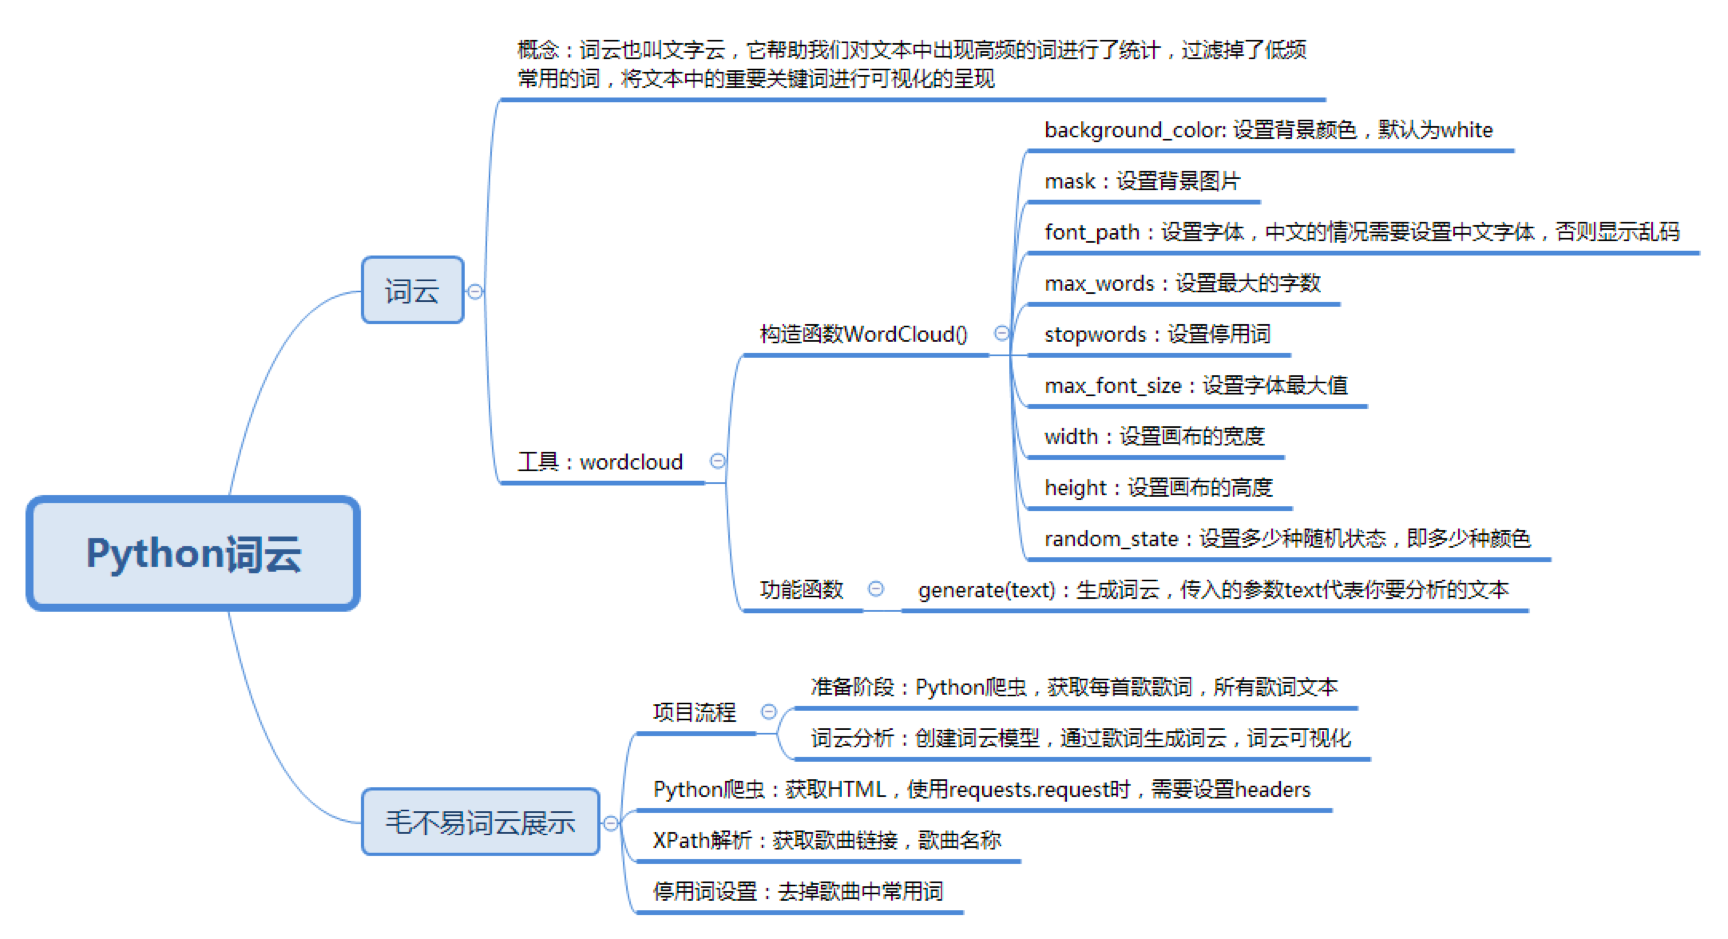

最后给你留一道思考题吧。我抓取了毛不易主页的歌词，是以歌手主页为粒度进行的词云可视化。实际上网易云音乐也有歌单的 API，比如http://music.163.com/api/playlist/detail?id=753776811。你能不能编写代码对歌单做个词云展示（比如歌单 ID 为 753776811）呢？

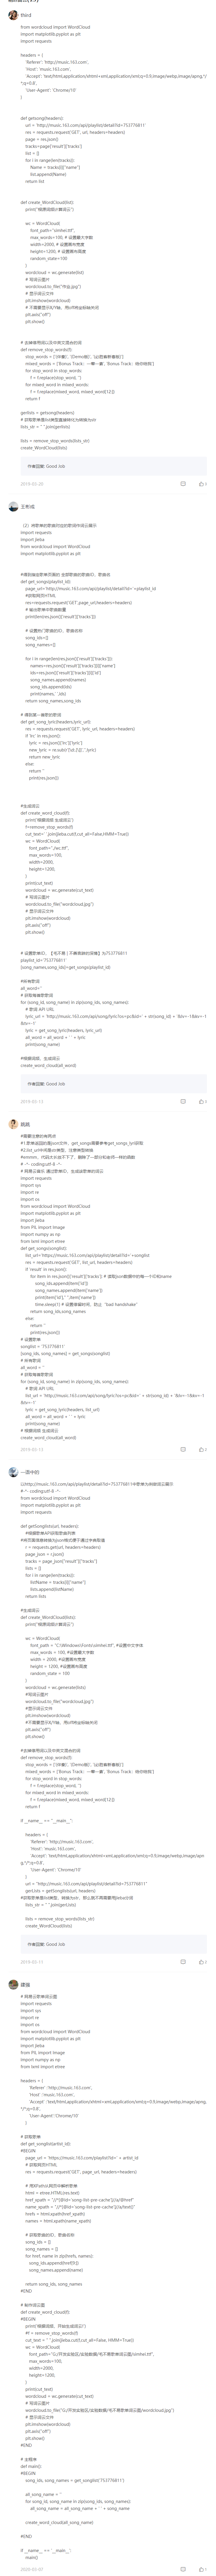